In [33]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as kb
import tensorflow as tf
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns; sns.set()
from sklearn.svm import SVC

# import svm model
from sklearn import svm

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

plt.rcParams['figure.figsize'] = '20,10' 
plt.style.use('ggplot')
from matplotlib import rc
rc('font', family='serif')
rc('font', size=20)

In [34]:
# importing data
df = pd.read_csv("/Users/iman/CPSC_Courses/CPSC393/CPSC393Assignment1/iris-1.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
print(df[0:3])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
# check for null vals
    # there are none
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
# dataset's species values seem to be imbalanced
df.value_counts("Species")

Species
Not-Iris-setosa    100
Iris-setosa         50
dtype: int64

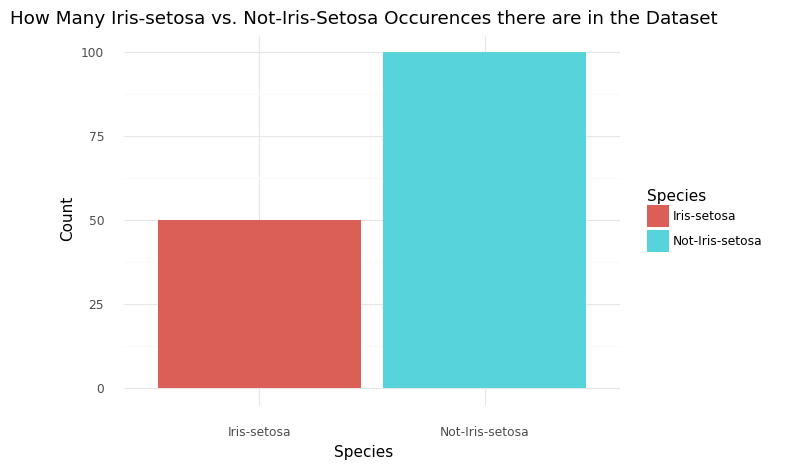

<ggplot: (8774276229345)>

In [27]:
# we can visually see the imbalance of the dataset
(ggplot(df) + geom_bar(aes(x='Species', fill = 'Species')) + theme_minimal() + xlab("Species") + 
ylab("Count") + 
ggtitle("How Many Iris-setosa vs. Not-Iris-Setosa Occurences there are in the Dataset"))

In [6]:
# Split Data
predictors = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

# Train-Test-Split
# Takes all of our data and splits it into a training set and a testing set
# Outputs training set for our predictors, testing set for our predictors, 
    # training set for our outcomes, testing set for our outcomes
# Use train, test, split fucntion and give it all our predictors and outcome 
    # (species in this case), and tell it how big we want our test set to be 
    # (30% in test set in this case)
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["Species"], test_size=0.3, random_state=109) # 70% training and 30% test

In [7]:
#how many rows and columns in our training set (70% of rows and columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [9]:
# Make sure you z score your continuous variables
# After creating train and test set, but before fitting model, we can z-score 
zscore = StandardScaler()
# ONLY FITTING ON TRAINING SET
zscore.fit(X_train)
# Use this to actually create the z-scores for the train and test set
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

In [10]:
# Build support vector machine model

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SvmClf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

['Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa' 'Iris-setosa'
 'Not-Iris-setosa' 'Not-Iris-setosa' 'Iris-setosa' 'Not-Iris-setosa'
 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa' 'Iris-setosa'
 'Not-Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Not-Iris-setosa' 'Not-Iris-setosa' 'Iris-setosa' 'Not-Iris-setosa'
 'Not-Iris-setosa' 'Iris-setosa' 'Not-Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa'
 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa'
 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa'
 'Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa'
 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa' 'Not-Iris-setosa'
 'Iris-setosa']


In [11]:
# Estimate how accurately the classifier or model can predict Iris-setosa/Not-Iris-setosa

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [12]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average="binary", pos_label="Iris-setosa"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average="binary", pos_label="Iris-setosa"))

Precision: 1.0
Recall: 1.0


Text(0.5, 1.0, 'SVM Classification Confusion Matrix')

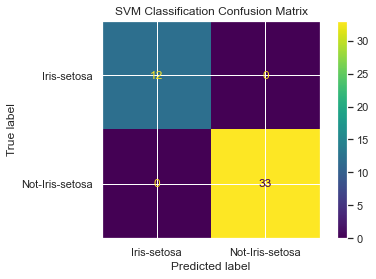

In [28]:
plot_confusion_matrix(SvmClf, X_test, y_test).ax_.set_title("SVM Classification Confusion Matrix")
# Confusion matrix:
# The model is making no errors in predicting whether the species is Iris-setosa or Not-Iris-setosa
# It is predicting the true labels accurately because if the prediction is Iris-setosa, the true label is Iris-setosa
    # If the prediction is Not-Iris-setosa, the true label is Not-Iris-setosa
# The predictions are very accurate, as we can see by the off-diagonal in the graph
# Since our model is making accurate predictions, it makes sense that the accuracy, precision and recall is 100%

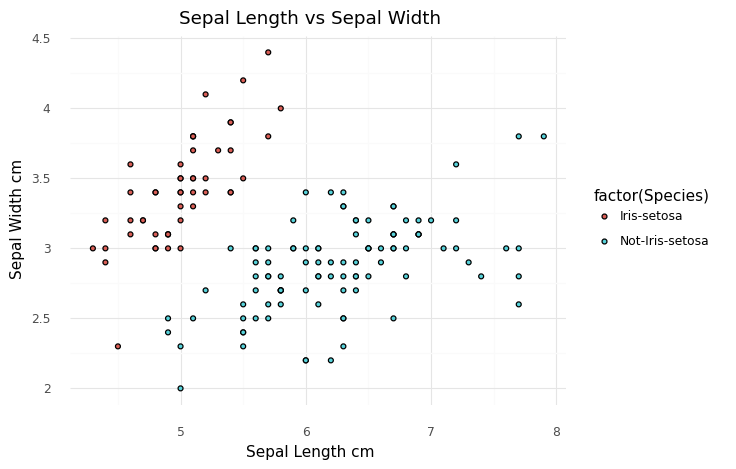

<ggplot: (8774276000185)>

In [16]:
(ggplot(df, aes(x = "SepalLengthCm", y = "SepalWidthCm", fill = "factor(Species)")) + 
theme_minimal() + geom_point() + xlab("Sepal Length cm") + 
ylab("Sepal Width cm") + ggtitle("Sepal Length vs Sepal Width"))

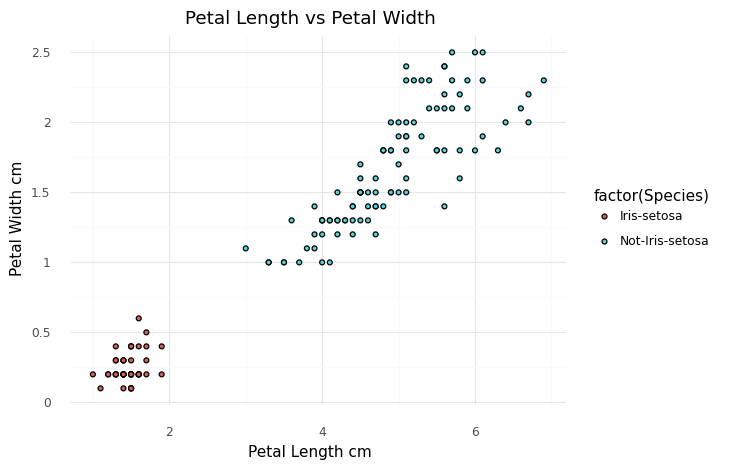

<ggplot: (8774276470345)>

In [17]:
(ggplot(df, aes(x = "PetalLengthCm", y = "PetalWidthCm", fill = "factor(Species)")) + 
theme_minimal() + geom_point() + xlab("Petal Length cm") + 
ylab("Petal Width cm") + ggtitle("Petal Length vs Petal Width"))

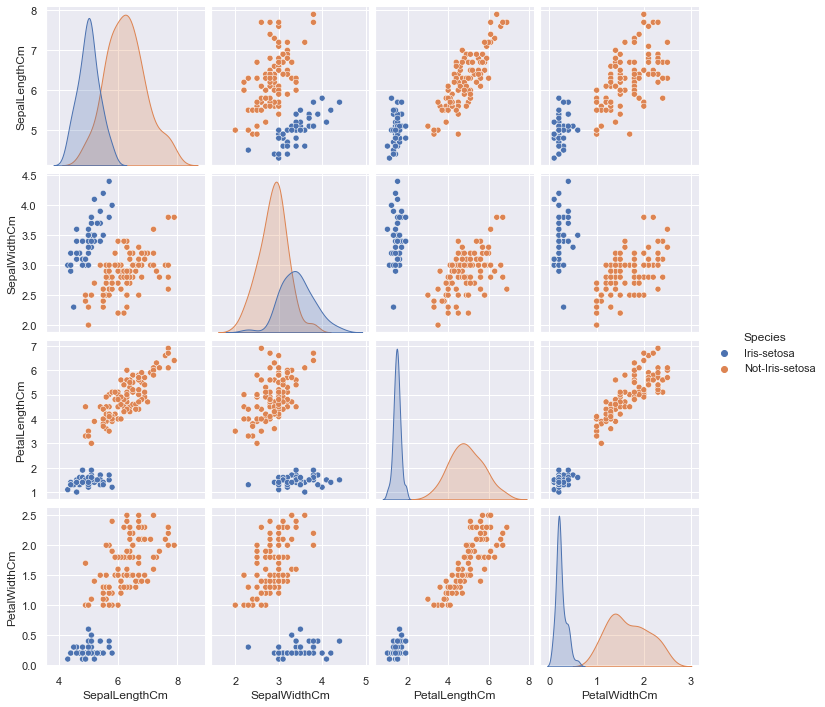

In [141]:
# see all of the variable relationships with each other in dataset through pairwise relationship
sns.pairplot(df, hue='Species', vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
plt.show()

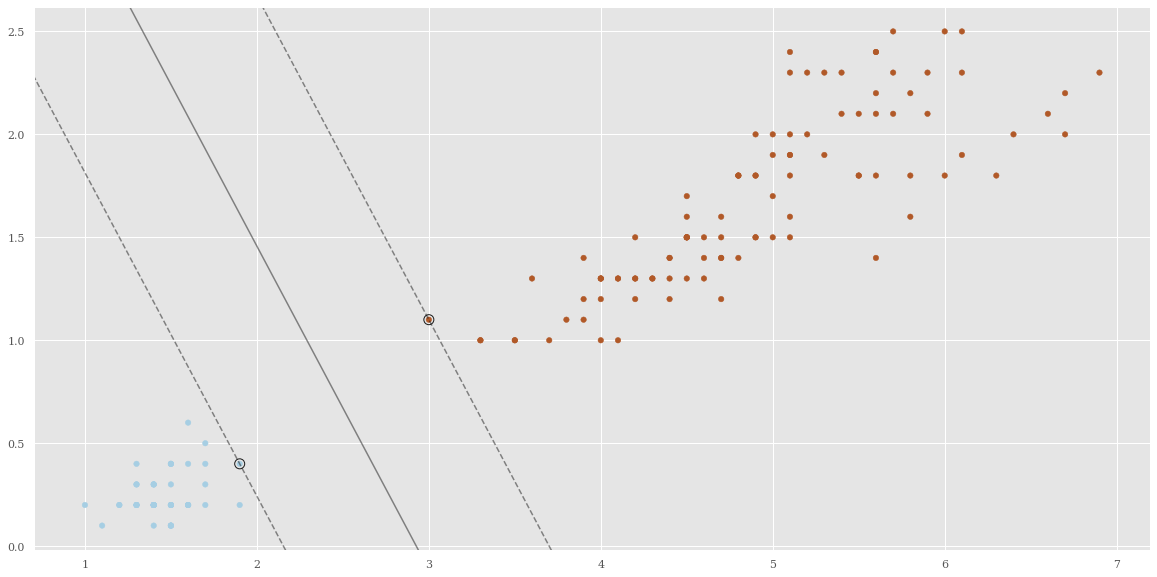

In [41]:
# referenced https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html 
# to plot SVM maximum margin separating hyperplane

X = df[['PetalLengthCm','PetalWidthCm']].values 
y = df.iloc[:, -1].values

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

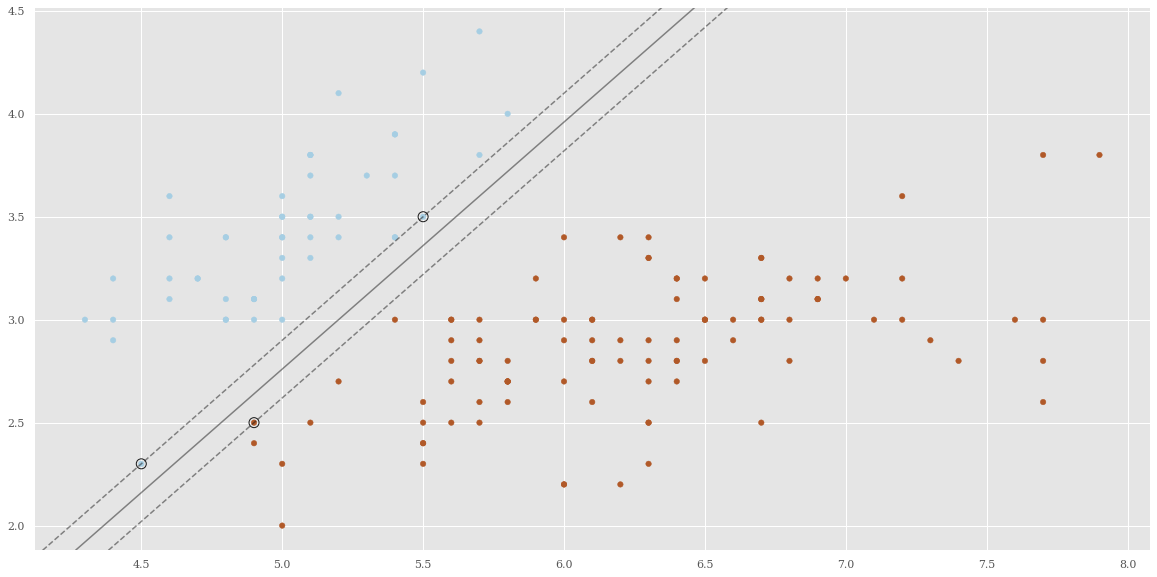

In [42]:
# referenced https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html 
# to plot SVM maximum margin separating hyperplane
X = df[['SepalLengthCm','SepalWidthCm']].values 
y = df.iloc[:, -1].values

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()